In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [59]:
# Load the dataset
# put your file path here
file_path = 'Netflix_cleaned_1.csv'
df = pd.read_csv(file_path)

In [60]:
df.head(2)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,difference,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,20,north america,missing,90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead
1,tv show,south africa,2021-09-24,9,24,2021,2021,tv-ma,NaN,2.0,8,africa,missing,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",s2,missing,"ama qamata, khosi ngema, gail mabalane, thaban...",blood & water


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7465 entries, 0 to 7464
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             7465 non-null   object 
 1   country          7465 non-null   object 
 2   date_added       7465 non-null   object 
 3   month            7465 non-null   int64  
 4   day              7465 non-null   int64  
 5   year             7465 non-null   int64  
 6   release_year     7465 non-null   int64  
 7   rating           7465 non-null   object 
 8   duration_min     4978 non-null   float64
 9   duration_season  2487 non-null   float64
 10  difference       7465 non-null   int64  
 11  continent        7465 non-null   object 
 12  country_cleaned  7465 non-null   object 
 13  duration         7465 non-null   object 
 14  listed_in        7465 non-null   object 
 15  description      7465 non-null   object 
 16  show_id          7465 non-null   object 
 17  director      

In [120]:
movies_df = df[df['type'] == 'movie']
shows_df = df[df['type'] == 'tv show']

In [121]:
genre_counts = {}
for row in movies_df.iterrows():
    lst = row[1]['listed_in'].split(',')
    for genre in lst:
        genre = genre.strip()
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

In [122]:
genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}
genre_counts

{'international movies': 2303,
 'dramas': 1943,
 'comedies': 1256,
 'documentaries': 817,
 'independent movies': 666,
 'action & adventure': 571,
 'children & family movies': 525,
 'thrillers': 489,
 'romantic movies': 475,
 'stand-up comedy': 314,
 'music & musicals': 295,
 'horror movies': 293,
 'sports movies': 188,
 'sci-fi & fantasy': 164,
 'lgbtq movies': 95,
 'faith & spirituality': 58,
 'movies': 53,
 'anime features': 49,
 'cult movies': 9,
 'classic movies': 1}

In [125]:
genre_counts = {}
for row in shows_df.iterrows():
    lst = row[1]['listed_in'].split(',')
    for genre in lst:
        genre = genre.strip()
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

In [126]:
genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}
genre_counts

{'international tv shows': 1283,
 'tv dramas': 730,
 'tv comedies': 533,
 'crime tv shows': 459,
 "kids' tv": 405,
 'docuseries': 372,
 'romantic tv shows': 343,
 'reality tv': 249,
 'british tv shows': 233,
 'spanish-language tv shows': 164,
 'tv action & adventure': 152,
 'anime series': 149,
 'korean tv shows': 148,
 'tv mysteries': 96,
 'science & nature tv': 85,
 'tv horror': 74,
 'tv sci-fi & fantasy': 74,
 'teen tv shows': 62,
 'tv thrillers': 55,
 'stand-up comedy & talk shows': 54,
 'classic & cult tv': 14,
 'tv shows': 10}

In [69]:
def one_hot_genre(listed_in, genre):
    lst = list(set(listed_in.split(',')))
    for i in lst:
        if genre in i:
            return 1
    return 0

In [104]:
# def month_to_season(month):
#     if month in [3, 4, 5]:
#         return 'Spr.'
#     elif month in [6, 7, 8]:
#         return 'Sum.'
#     elif month in [9, 10, 11]:
#         return 'Fal.'
#     elif month in [12, 1, 2]:
#         return 'Win.'

In [129]:
genres_df = df[['type', 'month', 'year', 'release_year', 'continent', 'listed_in']].copy()
genre_list = ['international', 'dramas', 'comedies', 'action', 'docu', 'thriller', 'romantic']
for genre in genre_list:
    genres_df[genre] = genres_df['listed_in'].apply(lambda row: one_hot_genre(row, genre))

genres_df['other'] = genres_df[genre_list].apply(lambda row: 1 if (row == 0).all() else 0, axis=1)
genres_df['season'] = genres_df['month'].apply(lambda month: month_to_season(month))
#genres_df['added_season'] = genres_df.apply(lambda row: str(row['season'])+' '+str(row['year']), axis=1)


In [130]:
genres_df

,type,month,year,release_year,continent,listed_in,international,dramas,comedies,action,docu,thriller,romantic,other,season
0,movie,9,2021,2020,north america,documentaries,0,0,0,0,1,0,0,0,Fal.
1,tv show,9,2021,2021,africa,"international tv shows, tv dramas, tv mysteries",1,1,0,0,0,0,0,0,Fal.
2,tv show,9,2021,2021,missing,"crime tv shows, international tv shows, tv act...",1,0,0,1,0,0,0,0,Fal.
3,tv show,9,2021,2021,missing,"docuseries, reality tv",0,0,0,0,1,0,0,0,Fal.
4,tv show,9,2021,2021,asia,"international tv shows, romantic tv shows, tv ...",1,0,1,0,0,0,1,0,Fal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7460,movie,12,2019,2014,asia,"comedies, dramas, international movies",1,1,1,0,0,0,0,0,Win.
7461,tv show,12,2016,2012,asia,"international tv shows, romantic tv shows, tv ...",1,1,0,0,0,0,1,0,Win.
7462,movie,3,2016,2015,asia,"dramas, international movies, thrillers",1,1,0,0,0,1,0,0,Spr.
7463,tv show,7,2019,2018,missing,"kids' tv, korean tv shows, tv comedies",0,0,1,0,0,0,0,0,Sum.


In [111]:
movies_df['added_season'].unique()

array(['Fal. 2021', 'Sum. 2021', 'Spr. 2021', 'Win. 2021', 'Win. 2020',
       'Fal. 2020', 'Sum. 2020', 'Spr. 2020', 'Win. 2019', 'Fal. 2019',
       'Sum. 2019', 'Spr. 2019', 'Win. 2018', 'Fal. 2018', 'Sum. 2018',
       'Spr. 2018', 'Win. 2017', 'Fal. 2017', 'Sum. 2017', 'Spr. 2017',
       'Win. 2016', 'Fal. 2016', 'Sum. 2016', 'Spr. 2016', 'Win. 2015',
       'Fal. 2015', 'Sum. 2015', 'Spr. 2015', 'Win. 2014', 'Fal. 2014',
       'Sum. 2014', 'Spr. 2014', 'Win. 2013', 'Fal. 2013', 'Win. 2012',
       'Spr. 2011', 'Fal. 2012'], dtype=object)

In [107]:
movies_df = genres_df[genres_df['type'] == 'movie']
shows_df = genres_df[genres_df['type'] == 'tv show']

In [ ]:
# define xtick positions for where we want to have labels
position = np.arange(0, len(df_avg),2)
# define xtick labels
label = ['Mar 2020', 'May 2020',  'Jul 2020',  'Sep 2020', 'Nov 2020', 'Jan 2021' ]

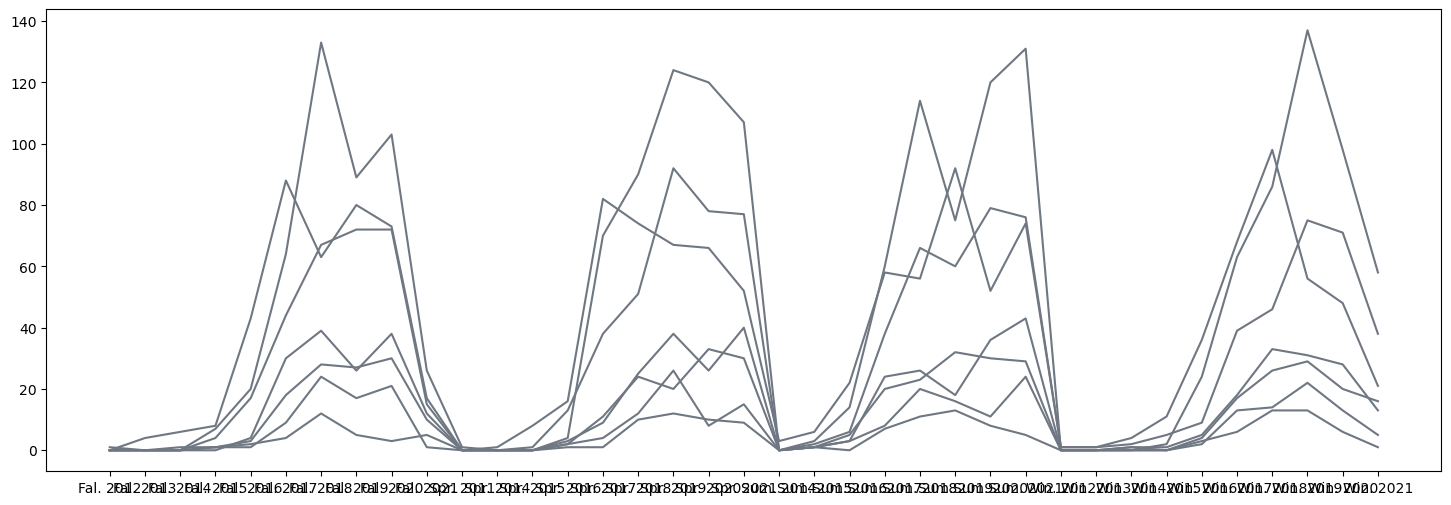

In [113]:
fig, ax = plt.subplots(figsize=(18,6))

genre_list = ['dramas', 'horror', 'comedies', 'action', 'fantasy', 'thriller', 'other']
for genre in genre_list:
    grouped = movies_df.groupby('added_season')[genre].sum()
    ax.plot(grouped, color = '#6f7782', label=genre)

position = np.arange(1, len(grouped),4)
label = ['Spr. 2011', 'May 2020',  'Jul 2020',  'Sep 2020', 'Nov 2020', 'Jan 2021' ]
    

In [47]:
df['release_year'].value_counts()

release_year
2018    1146
2017    1032
2019    1030
2020     953
2016     901
2021     592
2015     558
2014     352
2013     287
2012     236
2010     193
2011     185
Name: count, dtype: int64

In [48]:
genres = []
for row in df.iterrows():
    lst = list(set(row[1]['listed_in'].split(',')))
    cleaned = [s.strip() for s in lst]
    genres = genres + cleaned

genres = set(genres)

In [49]:
genres

{'action & adventure',
 'anime features',
 'anime series',
 'british tv shows',
 'children & family movies',
 'classic & cult tv',
 'classic movies',
 'comedies',
 'crime tv shows',
 'cult movies',
 'documentaries',
 'docuseries',
 'dramas',
 'faith & spirituality',
 'horror movies',
 'independent movies',
 'international movies',
 'international tv shows',
 "kids' tv",
 'korean tv shows',
 'lgbtq movies',
 'movies',
 'music & musicals',
 'reality tv',
 'romantic movies',
 'romantic tv shows',
 'sci-fi & fantasy',
 'science & nature tv',
 'spanish-language tv shows',
 'sports movies',
 'stand-up comedy',
 'stand-up comedy & talk shows',
 'teen tv shows',
 'thrillers',
 'tv action & adventure',
 'tv comedies',
 'tv dramas',
 'tv horror',
 'tv mysteries',
 'tv sci-fi & fantasy',
 'tv shows',
 'tv thrillers'}

In [50]:
len(genres)

42

In [51]:
df['type'].value_counts()

type
movie      4978
tv show    2487
Name: count, dtype: int64